In [18]:
import numpy as np                   
import matplotlib.pyplot as plt      
import scipy as sci                  
from scipy import integrate
from scipy import stats as stats
import pandas as pd

### Fig 2b - setup

In [19]:
def growth_rate(params, T):
    """
    Calculate the growth rate based on a skewed Gaussian distribution.
    
    Parameters:
        params (list): List of parameters [a, loc] where 'a' represents skewedness and 'loc' represents location.
        T (float): Temperature value for which the growth rate needs to be calculated.
    
    Returns:
        float: Calculated growth rate based on the skewed Gaussian distribution.
    """
    a = params[0]  # Skewedness parameter
    loc = params[1]  # Location parameter
    scale = 10  # Scale parameter for the skewed Gaussian distribution
    x = np.linspace(10, 50, 100)  # Generate an array of temperature values from 10 to 50
    rates = stats.skewnorm.pdf(x, a, loc, scale)  # Calculate skewed Gaussian distribution for the temperature range
    rate = stats.skewnorm.pdf(T, a, loc, scale)  # Calculate skewed Gaussian distribution for the given temperature T
    rnorm = rate / max(rates)  # Normalize the calculated rate based on the maximum rate in the distribution
    rate = rnorm * 0.08  # Scale the normalized rate to a specific growth rate range
    return rate

In [20]:
def temp_rate(N, t, r1, r2, r3, K1, K2, K3):
    """
    Calculate the rate of change of population for three species based on temperature and growth rates.
    
    Parameters:
        N (list): List of initial population sizes for three species [N1, N2, N3].
        t (float): Time parameter (not used in the function, but included for completeness).
        r1 (list): Parameters for growth_rate function for species 1 [a1, loc1].
        r2 (list): Parameters for growth_rate function for species 2 [a2, loc2].
        r3 (list): Parameters for growth_rate function for species 3 [a3, loc3].
        K1 (float): Carrying capacity for species 1.
        K2 (float): Carrying capacity for species 2.
        K3 (float): Carrying capacity for species 3.
    
    Returns:
        np.array: Array of the rate of change of population for three species [dN1, dN2, dN3].
    """
    k = K1 + K2 + K3  # Total carrying capacity for all species
    n = N[0] + N[1] + N[2]  # Total population size for all species
    # Calculate the rate of change of population for each species based on growth rates and carrying capacities
    dN_1 = growth_rate(r1, temp) * N[0] * (K1 - n) / K1
    dN_2 = growth_rate(r2, temp) * N[1] * (K2 - n) / K2
    dN_3 = growth_rate(r3, temp) * N[2] * (K3 - n) / K3
    return np.array([dN_1, dN_2, dN_3])

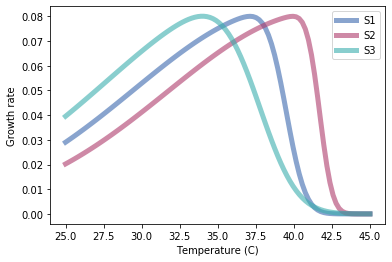

In [21]:
# Generate a list of 100 temperature values ranging from 25 to 45 degrees Celsius
temp_list = np.linspace(25, 45, 100)

# Parameters for skewed Gaussian distributions for three species (S1, S2, S3)
r_S3 = [-5, 37.7]
r_S1 = [-10, 39.5]
r_S2 = [-15, 41.7]
scale = 10  # Scale parameter for the skewed Gaussian distribution

# Find the temperature at which each species has the maximum growth rate
x = np.linspace(10, 50, 100)  # Generate an extended temperature range for accurate peak calculation
topt_S1 = x[np.argmax(stats.skewnorm.pdf(x, r_S1[0], r_S1[1], scale))]
topt_S2 = x[np.argmax(stats.skewnorm.pdf(x, r_S2[0], r_S2[1], scale))]
topt_S3 = x[np.argmax(stats.skewnorm.pdf(x, r_S3[0], r_S3[1], scale))]

# Define colors for each species for plotting
s1_col = "#3A68AE"
s2_col = "#AE3A6B"
s3_col = "#3AAEAE"

# Create a plot to visualize growth rates for the three species at different temperatures
fig, ax = plt.subplots(1, 1)
ax.plot(temp_list, growth_rate(r_S1, temp_list),
        s1_col, lw=5, alpha=0.6, label="S1")
ax.plot(temp_list, growth_rate(r_S2, temp_list),
        s2_col, lw=5, alpha=0.6, label="S2")
ax.plot(temp_list, growth_rate(r_S3, temp_list),
        s3_col, lw=5, alpha=0.6, label='S3')

# Set labels for the x and y axes, and save the plot as a PDF file
ax.set(xlabel="Temperature (C)", ylabel="Growth rate")
plt.legend()  # Show legend for species labels
plt.savefig("figs/growth_temp.png", transparent=True)  # Save the plot as a PDF file with transparent background

Topt of S1 is: 37.07070707070707
Topt of S2 is: 39.898989898989896
Topt of S3 is: 33.838383838383834


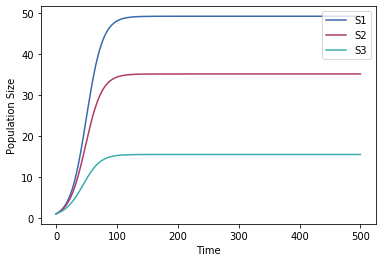

<Figure size 432x288 with 0 Axes>

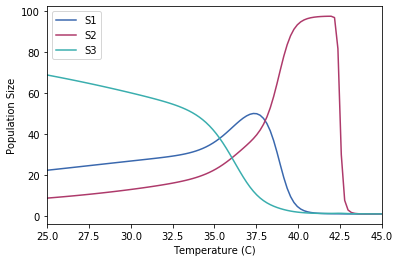

In [22]:
# Initial population sizes for species S1, S2, and S3
S1 = np.array([])
S2 = np.array([])
S3 = np.array([])
NI = np.array([1, 1, 1])

# Carrying capacities for species S1, S2, and S3
K1 = 100
K2 = 100
K3 = 100

# Time vector from 0 to 500 with 1000 points
t = np.linspace(0, 500, 1000)

# Temperature for ODE integration
temp = 37

# Solving the ODE system using odeint function
sol = sci.integrate.odeint(temp_rate, NI, t, args=(r_S1, r_S2, r_S3, K1, K2, K3))

# Plotting population sizes over time
plt.plot(t, sol[:, 0], color=s1_col, label="S1")
plt.plot(t, sol[:, 1], color=s2_col, label="S2")
plt.plot(t, sol[:, 2], color=s3_col, label="S3")
plt.legend(loc="upper right")
plt.xlabel("Time")
plt.ylabel("Population Size")
plt.savefig("figs/competition_time.png", transparent=True)
plt.figure()

# Integrating ODE for different temperatures and storing final population sizes
for i in range(len(temp_list)):
    temp = temp_list[i]
    sol = sci.integrate.odeint(temp_rate, NI, t, args=(r_S1, r_S2, r_S3, K1, K2, K3))
    S1 = np.append(S1, sol[-1, 0])
    S2 = np.append(S2, sol[-1, 1])
    S3 = np.append(S3, sol[-1, 2])

# Creating a DataFrame to store population sizes for different temperatures
main_df = pd.DataFrame(columns=["S1", "S2", "S3"], index=temp_list)
main_df["S3"] = S3
main_df["S1"] = S1
main_df["S2"] = S2

# Plotting population sizes over different temperatures
colors = [s1_col, s2_col, s3_col]
main_df.plot(color=colors)
plt.xlabel("Temperature (C)")
plt.ylabel("Population Size")
plt.savefig("figs/competition_temp.png", transparent=True)

# Printing the optimal temperatures for each species
print("Topt of S1 is:", topt_S1)
print("Topt of S2 is:", topt_S2)
print("Topt of S3 is:", topt_S3)

### Stress testing

#### Two species
Showing the results of two species competition models as opposed to the three species competition model used for Figure 2b.

In [23]:
def temp_rate_2species(N, t, r1, r2, K1, K2):
    """
    Calculate the rate of change of population for two species based on temperature and growth rates.
    
    Parameters:
        N (list): List of initial population sizes for two species [N1, N2].
        t (float): Time parameter (not used in the function, but included for completeness).
        r1 (list): Parameters for growth_rate function for species 1 [a1, loc1].
        r2 (list): Parameters for growth_rate function for species 2 [a2, loc2].
        K1 (float): Carrying capacity for species 1.
        K2 (float): Carrying capacity for species 2.
    
    Returns:
        np.array: Array of the rate of change of population for two species [dN1, dN2].
    """
    k = K1 + K2  # Total carrying capacity for both species
    n = N[0] + N[1]  # Total population size for both species
    
    # Calculate the rate of change of population for each species based on growth rates and carrying capacities
    dN_1 = growth_rate(r1, temp) * N[0] * (K1 - n) / K1
    dN_2 = growth_rate(r2, temp) * N[1] * (K2 - n) / K2
    
    return np.array([dN_1, dN_2])

##### S1 vs S2

Topt of S1 is: 37.07070707070707
Topt of S2 is: 39.898989898989896


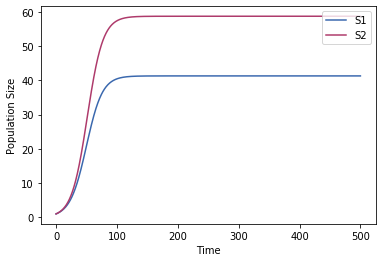

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

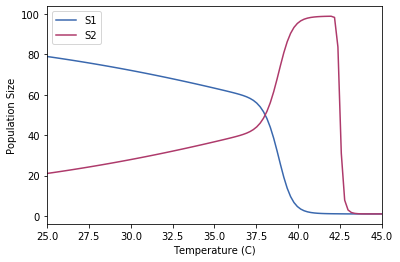

In [24]:
# Initial empty arrays for storing population sizes
S1 = np.array([])  # Population sizes of species S1 over time
S2 = np.array([])  # Population sizes of species S2 over time

# Initial population sizes for species S1 and S2
NI = np.array([1, 1])

# Time vector from 0 to 500 with 1000 points
t = np.linspace(0, 500, 1000)

# Constant temperature for ODE integration
temp = 37

# Solving the ODE system for two species using odeint function
sol = sci.integrate.odeint(temp_rate_2species, NI, t, args=(r_S1, r_S2, K1, K2))

# Colors for plotting the population sizes of species S1 and S2
s1_col = "#3A68AE"
s2_col = "#AE3A6B"

# Plotting population sizes of species S1 and S2 over time
plt.plot(t, sol[:, 1], color=s1_col, label="S1")
plt.plot(t, sol[:, 0], color=s2_col, label="S2")
plt.legend(loc="upper right")
plt.xlabel("Time")
plt.ylabel("Population Size")
plt.savefig("figs/2species_a_time.png", transparent=True)
plt.figure()

# Integrating ODE for different temperatures and storing final population sizes
for i in range(len(temp_list)):
    temp = temp_list[i]
    sol = sci.integrate.odeint(temp_rate_2species, NI, t, args=(r_S1, r_S2, K1, K2))
    S1 = np.append(S1, sol[-1, 0])
    S2 = np.append(S2, sol[-1, 1])

# Creating a DataFrame to store population sizes for different temperatures
colors = [s1_col, s2_col]
df = pd.DataFrame(columns=["S1", "S2"], index=temp_list)
df["S2"] = S2
df["S1"] = S1

# Plotting population sizes of species S1 and S2 over different temperatures
plt.figure()
df.plot(color=colors)
plt.xlabel("Temperature (C)")
plt.ylabel("Population Size")
plt.savefig("figs/2species_a_temp.png", transparent=True)

# Printing the optimal temperatures for each species
print("Topt of S1 is:", topt_S1)
print("Topt of S2 is:", topt_S2)

##### S1 vs S3

Topt of S1 is: 37.07070707070707
Topt of S3 is: 33.838383838383834


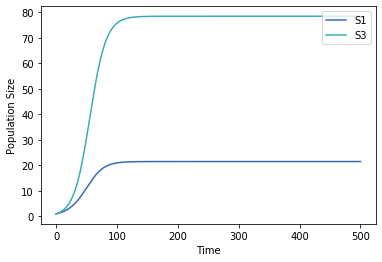

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

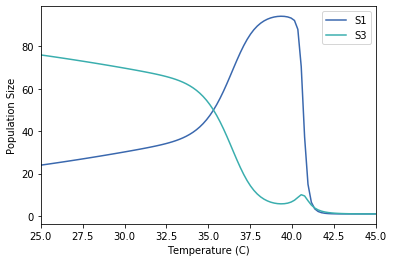

In [25]:
# Initial empty arrays for storing population sizes
S1 = np.array([])  # Population sizes of species S1 over time
S3 = np.array([])  # Population sizes of species S3 over time

# Initial population sizes for species S1 and S3
NI = np.array([1, 1])

# Time vector from 0 to 500 with 1000 points
t = np.linspace(0, 500, 1000)

# Constant temperature for ODE integration
temp = 37

# Solving the ODE system for two species (S1 and S3) using odeint function
sol = sci.integrate.odeint(temp_rate_2species, NI, t, args=(r_S1, r_S3, K1, K3))

# Colors for plotting the population sizes of species S1 and S3
s1_col = "#3A68AE"
s3_col = "#3AAEAE"

# Plotting population sizes of species S1 and S3 over time
plt.plot(t, sol[:, 1], color=s1_col, label="S1")
plt.plot(t, sol[:, 0], color=s3_col, label="S3")
plt.legend(loc="upper right")
plt.xlabel("Time")
plt.ylabel("Population Size")
plt.savefig("figs/2species_b_time.png", transparent=True)
plt.figure()

# Integrating ODE for different temperatures and storing final population sizes
for i in range(len(temp_list)):
    temp = temp_list[i]
    sol = sci.integrate.odeint(temp_rate_2species, NI, t, args=(r_S1, r_S3, K1, K3))
    S1 = np.append(S1, sol[-1, 0])
    S3 = np.append(S3, sol[-1, 1])

# Creating a DataFrame to store population sizes for different temperatures
colors = [s1_col, s3_col]
df = pd.DataFrame(columns=["S1", "S3"], index=temp_list)
df["S3"] = S3
df["S1"] = S1

# Plotting population sizes of species S1 and S3 over different temperatures
plt.figure()
df.plot(color=colors)
plt.xlabel("Temperature (C)")
plt.ylabel("Population Size")
plt.savefig("figs/2species_b_temp.png", transparent=True)

# Printing the optimal temperatures for species S1 and S3
print("Topt of S1 is:", topt_S1)
print("Topt of S3 is:", topt_S3)

#### Normalized versus non-normalized
Running the same conditions as for Figure 2b except without normalizing the growth rate responses to temperature.

In [26]:
def growth_rate_nonorm(params, T):
    """
    Calculate the growth rate based on a skewed Gaussian distribution without normalization.
    
    Parameters:
        params (list): List of parameters [a, loc] where 'a' represents skewedness and 'loc' represents location.
        T (float): Temperature value for which the growth rate needs to be calculated.
    
    Returns:
        float: Calculated growth rate based on the skewed Gaussian distribution.
    """
    a = params[0]  # Skewedness parameter
    loc = params[1]  # Location parameter
    scale = 10  # Scale parameter for the skewed Gaussian distribution
    
    # Calculate the growth rate using skewed Gaussian distribution without normalization
    rate = stats.skewnorm.pdf(T, a, loc, scale)
    return rate

In [27]:
def temp_rate_nonorm(N, t, r1, r2, r3, K1, K2, K3):
    """
    Calculate the rate of change of population for three species based on temperature and non-normalized growth rates.
    
    Parameters:
        N (list): List of initial population sizes for three species [N1, N2, N3].
        t (float): Time parameter (not used in the function, but included for completeness).
        r1 (list): Parameters for growth_rate_nonorm function for species 1 [a1, loc1].
        r2 (list): Parameters for growth_rate_nonorm function for species 2 [a2, loc2].
        r3 (list): Parameters for growth_rate_nonorm function for species 3 [a3, loc3].
        K1 (float): Carrying capacity for species 1.
        K2 (float): Carrying capacity for species 2.
        K3 (float): Carrying capacity for species 3.
    
    Returns:
        np.array: Array of the rate of change of population for three species [dN1, dN2, dN3].
    """
    k = K1 + K2 + K3  # Total carrying capacity for all species
    n = N[0] + N[1] + N[2]  # Total population size for all species
    
    # Calculate the rate of change of population for each species based on non-normalized growth rates and carrying capacities
    dN_1 = growth_rate_nonorm(r1, temp) * N[0] * (K1 - n) / K1
    dN_2 = growth_rate_nonorm(r2, temp) * N[1] * (K2 - n) / K2
    dN_3 = growth_rate_nonorm(r3, temp) * N[2] * (K3 - n) / K3
    
    return np.array([dN_1, dN_2, dN_3])

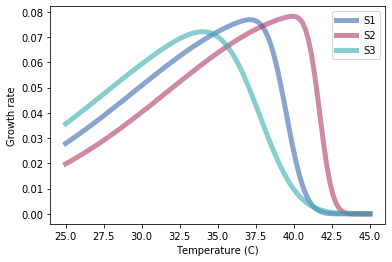

In [28]:
# Generate a list of 100 temperature values ranging from 25 to 45 degrees Celsius
temp_list = np.linspace(25, 45, 100)

# Parameters for skewed Gaussian distributions for three species (S1, S2, S3)
r_S3 = [-5, 37.7]
r_S1 = [-10, 39.5]
r_S2 = [-15, 41.7]
scale = 10  # Scale parameter for the skewed Gaussian distribution

# Find the temperature at which each species has the maximum growth rate
x = np.linspace(10, 50, 100)  # Generate an extended temperature range for accurate peak calculation
topt_S1 = x[np.argmax(stats.skewnorm.pdf(x, r_S1[0], r_S1[1], scale))]
topt_S2 = x[np.argmax(stats.skewnorm.pdf(x, r_S2[0], r_S2[1], scale))]
topt_S3 = x[np.argmax(stats.skewnorm.pdf(x, r_S3[0], r_S3[1], scale))]

# Define colors for each species for plotting
s1_col = "#3A68AE"
s2_col = "#AE3A6B"
s3_col = "#3AAEAE"

# Create a plot to visualize growth rates for the three species at different temperatures
fig, ax = plt.subplots(1, 1)
ax.plot(temp_list, growth_rate_nonorm(r_S1, temp_list),
        s1_col, lw=5, alpha=0.6, label="S1")
ax.plot(temp_list, growth_rate_nonorm(r_S2, temp_list),
        s2_col, lw=5, alpha=0.6, label="S2")
ax.plot(temp_list, growth_rate_nonorm(r_S3, temp_list),
        s3_col, lw=5, alpha=0.6, label='S3')

# Set labels for the x and y axes, and save the plot as a PDF file
ax.set(xlabel="Temperature (C)", ylabel="Growth rate")
plt.legend()  # Show legend for species labels
plt.savefig("figs/nonorm_rate.png", transparent=True)

Topt of S1 is: 37.07070707070707
Topt of S2 is: 39.898989898989896
Topt of S3 is: 33.838383838383834


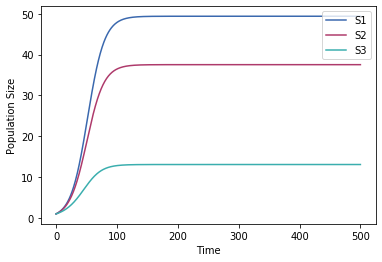

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

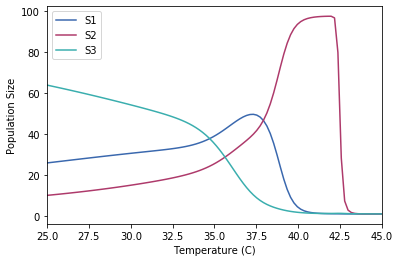

In [29]:
# Initial empty arrays for storing population sizes
S1 = np.array([])  # Population sizes of species S1 over different temperatures
S2 = np.array([])  # Population sizes of species S2 over different temperatures
S3 = np.array([])  # Population sizes of species S3 over different temperatures

# Initial population sizes for species S1, S2, and S3
NI = np.array([1, 1, 1])

# Carrying capacities for species S1, S2, and S3
K1 = 100
K2 = 100
K3 = 100

# Time vector from 0 to 500 with 1000 points
t = np.linspace(0, 500, 1000)

# Constant temperature for ODE integration
temp = 37

# Solving the ODE system for three species (S1, S2, and S3) using non-normalized growth rates
sol_nonorm = sci.integrate.odeint(temp_rate_nonorm, NI, t, args=(r_S1, r_S2, r_S3, K1, K2, K3))

# Colors for plotting the population sizes of species S1, S2, and S3
s1_col = "#3A68AE"
s2_col = "#AE3A6B"
s3_col = "#3AAEAE"

# Plotting population sizes of species S1, S2, and S3 over time
plt.plot(t, sol_nonorm[:, 0], color=s1_col, label="S1")
plt.plot(t, sol_nonorm[:, 1], color=s2_col, label="S2")
plt.plot(t, sol_nonorm[:, 2], color=s3_col, label="S3")
plt.legend(loc="upper right")
plt.xlabel("Time")
plt.ylabel("Population Size")
plt.savefig("figs/nonorm_time.png", transparent=True)
plt.figure()

# Integrating ODE for different temperatures and storing final population sizes
for i in range(len(temp_list)):
    temp = temp_list[i]
    sol = sci.integrate.odeint(temp_rate_nonorm, NI, t, args=(r_S1, r_S2, r_S3, K1, K2, K3))
    S1 = np.append(S1, sol[-1, 0])
    S2 = np.append(S2, sol[-1, 1])
    S3 = np.append(S3, sol[-1, 2])

# Creating a DataFrame to store population sizes for different temperatures
colors = [s1_col, s2_col, s3_col]
df_nonorm = pd.DataFrame(columns=["S1", "S2", "S3"], index=temp_list)
df_nonorm["S1"] = S1
df_nonorm["S2"] = S2
df_nonorm["S3"] = S3

# Plotting population sizes of species S1, S2, and S3 over different temperatures
plt.figure()
df_nonorm.plot(color=colors)
plt.xlabel("Temperature (C)")
plt.ylabel("Population Size")
plt.savefig("figs/nonorm_temp.png", transparent=True)

# Printing the optimal temperatures for species S1, S2, and S3
print("Topt of S1 is:", topt_S1)
print("Topt of S2 is:", topt_S2)
print("Topt of S3 is:", topt_S3)

#### Shifting
Running the competition without any change in skewedness of growth rate temperature responses of the species, instead the location of the optimum is the only parameter that changes.

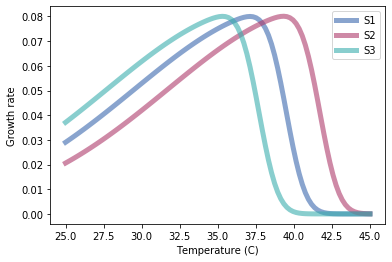

In [30]:
# Parameters defining the skewed Gaussian distribution for three species S1, S2, and S3
r_S3 = [-10, 37.7]  # Parameters [a, loc] for species S3
r_S1 = [-10, 39.5]  # Parameters [a, loc] for species S1
r_S2 = [-10, 41.7]  # Parameters [a, loc] for species S2

# Generating an array of temperatures from 25°C to 45°C
temp_list = np.linspace(25, 45, 100)

# Calculating the optimal temperatures (Topt) for each species based on the skewed Gaussian distribution
x = np.linspace(10, 50, 100)  # x values for the skewed Gaussian distribution
scale = 10  # Scale parameter for the skewed Gaussian distribution
topt_S1 = x[np.argmax(stats.skewnorm.pdf(x, r_S1[0], r_S1[1], scale))]  # Optimal temperature for species S1
topt_S2 = x[np.argmax(stats.skewnorm.pdf(x, r_S2[0], r_S2[1], scale))]  # Optimal temperature for species S2
topt_S3 = x[np.argmax(stats.skewnorm.pdf(x, r_S3[0], r_S3[1], scale))]  # Optimal temperature for species S3

# Creating a plot to visualize the growth rates of species S1, S2, and S3 over different temperatures
fig, ax = plt.subplots(1, 1)

# Plotting the growth rates for species S1, S2, and S3
ax.plot(temp_list, growth_rate(r_S1, temp_list), '#3A68AE', lw=5, alpha=0.6, label="S1")
ax.plot(temp_list, growth_rate(r_S2, temp_list), '#AE3A6B', lw=5, alpha=0.6, label="S2")
ax.plot(temp_list, growth_rate(r_S3, temp_list), '#3AAEAE', lw=5, alpha=0.6, label='S3')

# Setting labels and title for the plot
ax.set(xlabel="Temperature (C)", ylabel="Growth rate")
ax.legend(loc="upper right")
plt.savefig("figs/shift_rates.png", transparent=True)
# Displaying the plot
plt.show()

Topt of S1 is: 37.07070707070707
Topt of S2 is: 39.494949494949495
Topt of S3 is: 35.45454545454545


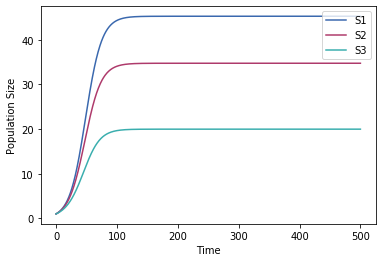

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

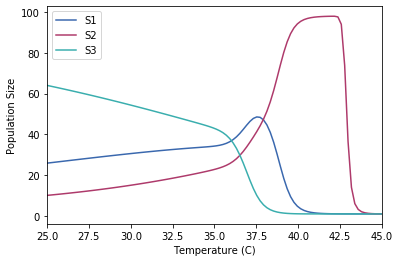

In [31]:
# Initial empty arrays for storing population sizes
S1 = np.array([])  # Population sizes of species S1 over different temperatures
S2 = np.array([])  # Population sizes of species S2 over different temperatures
S3 = np.array([])  # Population sizes of species S3 over different temperatures

# Initial population sizes for species S1, S2, and S3
NI = np.array([1, 1, 1])

# Carrying capacities for species S1, S2, and S3
K1 = 100
K2 = 100
K3 = 100

# Time vector from 0 to 500 with 1000 points
t = np.linspace(0, 500, 1000)

# Constant temperature for ODE integration
temp = 37

# Solving the ODE system for three species (S1, S2, and S3) using the temp_rate function
sol = sci.integrate.odeint(temp_rate, NI, t, args=(r_S1, r_S2, r_S3, K1, K2, K3))

# Colors for plotting the population sizes of species S1, S2, and S3
s1_col = "#3A68AE"
s2_col = "#AE3A6B"
s3_col = "#3AAEAE"

# Plotting population sizes of species S1, S2, and S3 over time
plt.plot(t, sol[:, 0], color=s1_col, label="S1")
plt.plot(t, sol[:, 1], color=s2_col, label="S2")
plt.plot(t, sol[:, 2], color=s3_col, label="S3")
plt.legend(loc="upper right")
plt.xlabel("Time")
plt.ylabel("Population Size")
plt.savefig("figs/shift_time.png", transparent=True)
plt.figure()

# Integrating ODE for different temperatures and storing final population sizes
for i in range(len(temp_list)):
    temp = temp_list[i]
    sol = sci.integrate.odeint(temp_rate, NI, t, args=(r_S1, r_S2, r_S3, K1, K2, K3))
    S1 = np.append(S1, sol[-1, 0])
    S2 = np.append(S2, sol[-1, 1])
    S3 = np.append(S3, sol[-1, 2])

# Creating a DataFrame to store population sizes for different temperatures
colors = [s1_col, s2_col, s3_col]
df = pd.DataFrame(columns=["S1", "S2", "S3"], index=temp_list)
df["S1"] = S1
df["S2"] = S2
df["S3"] = S3

# Plotting population sizes of species S1, S2, and S3 over different temperatures
plt.figure()
df.plot(color=colors)
plt.xlabel("Temperature (C)")
plt.ylabel("Population Size")
plt.savefig("figs/shift_temp.png", transparent=True)

# Printing the optimal temperatures for species S1, S2, and S3
print("Topt of S1 is:", topt_S1)
print("Topt of S2 is:", topt_S2)
print("Topt of S3 is:", topt_S3)

#### Skewedness
Running competition experiments with shifted growth rate temperature responses ranging from normal, unskewed Gaussian distributions (skewedness of 0) to highly skewed Gaussian distributions (skewedness of -20).

In [32]:
# Parameters defining the skewed Gaussian distribution for species S1
r_S1 = [-10, 39.5]

# List of skewness values for generating different skewed distributions for S2 and S3
skewy = [0, -2.50, -5, -7.5, -10, -15, -20]

# Empty list to store simulation results
out = []

# Iterating through different skewness values and temperatures to simulate population dynamics
for j in range(len(skewy)):
    # Parameters defining the skewed Gaussian distributions for species S2 and S3
    r_S3 = [skewy[j], 37.7]
    r_S2 = [skewy[j], 41.7]
    
    # Iterating through different temperatures
    for i in range(len(temp_list)):
        temp = temp_list[i]
        
        # Solving the ODE system for species S1, S2, and S3 at the current temperature and skewness values
        sol = sci.integrate.odeint(temp_rate, NI, t, args=(r_S1, r_S2, r_S3, K1, K2, K3))
        
        # Storing the simulation results in a dictionary and appending it to the output list
        out.append(
            {'Temp': temp,
            'Skew': skewy[j],
            'S1': sol[-1, 0],  # Final population size of species S1
            'S2': sol[-1, 1],  # Final population size of species S2
            'S3': sol[-1, 2]})  # Final population size of species S3

# Creating a DataFrame from the simulation results
out_df = pd.DataFrame(out)

# Setting the 'Temp' column as the index of the DataFrame out_df
out_df = out_df.set_index('Temp')

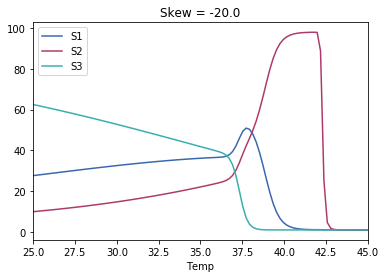

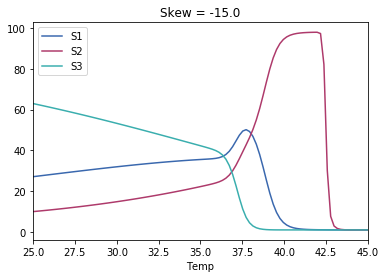

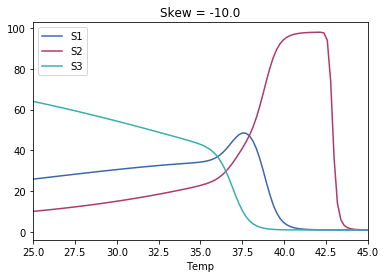

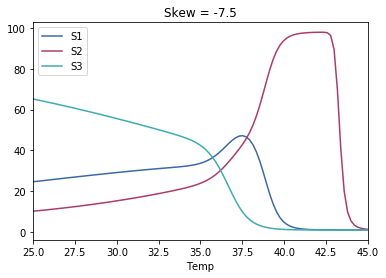

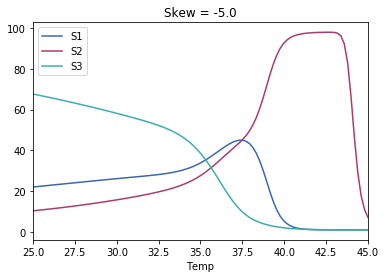

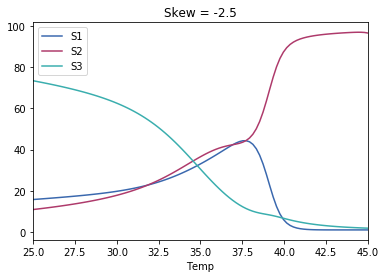

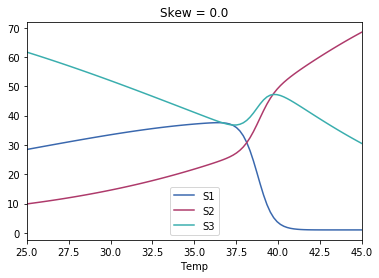

In [33]:
# List of colors for plotting: White for background, and s1_col, s2_col, s3_col for species S1, S2, and S3 respectively
colors = [s1_col, s2_col, s3_col]

# Iterating through different skewness values and grouping the DataFrame out_df by 'Skew'
for skew_value, group in out_df.groupby('Skew'):
    # Plotting only 'S1', 'S2', and 'S3' columns with specified colors and using skewness values as plot titles
    group[['S1', 'S2', 'S3']].plot(color=colors, title=f"Skew = {skew_value}")
    plt.savefig("figs/" + f"skew_{skew_value}.png")

#### Temperature differences

In [34]:
# Parameters defining the skewed Gaussian distribution for species S1
r_S1 = [-10, 39.5]

# List of temperature differences for generating different skewed distributions for S2 and S3
delta_T = [0.1, 0.5, 1, 2, 5, 10]

# Empty array to store population sizes for S1, S2, and S3 at different temperatures and temperature differences
out = []

# Iterating through different temperature differences and temperatures to simulate population dynamics
for j in range(len(delta_T)):
    # Parameters defining the skewed Gaussian distributions for species S2 and S3 based on temperature differences
    r_S2 = [-10, r_S1[1] + delta_T[j]]
    r_S3 = [-10, r_S1[1] - delta_T[j]]
    
    # Iterating through different temperatures
    for i in range(len(temp_list)):
        temp = temp_list[i]
        
        # Solving the ODE system for species S1, S2, and S3 at the current temperature and temperature differences
        sol = sci.integrate.odeint(temp_rate, NI, t, args=(r_S1, r_S2, r_S3, K1, K2, K3))
        
        # Storing the simulation results in a dictionary and appending it to the output list
        out.append(
            {'Temp': temp,
            'Delta T': delta_T[j],
            'S1': sol[-1, 0],  # Final population size of species S1
            'S2': sol[-1, 1],  # Final population size of species S2
            'S3': sol[-1, 2]})  # Final population size of species S3

# Creating a DataFrame from the simulation results
out_df = pd.DataFrame(out)

# Setting the 'Temp' column as the index of the DataFrame out_df
out_df = out_df.set_index('Temp')

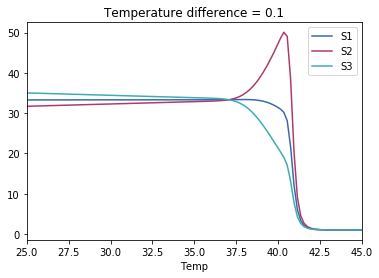

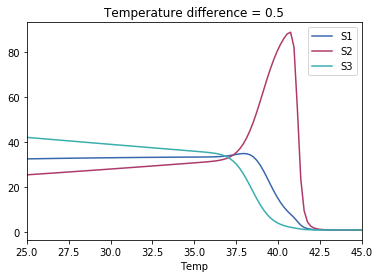

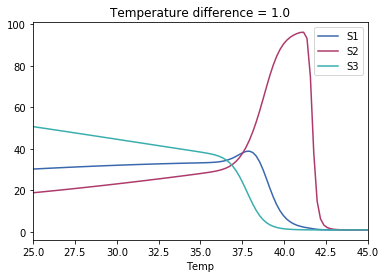

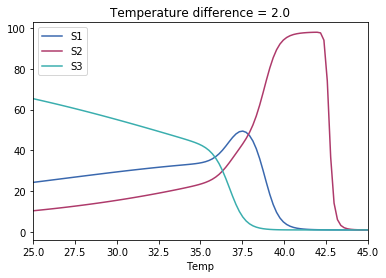

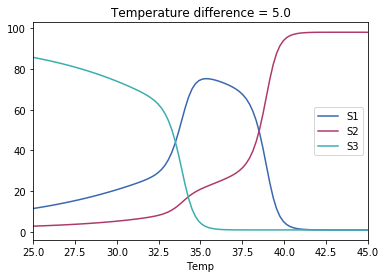

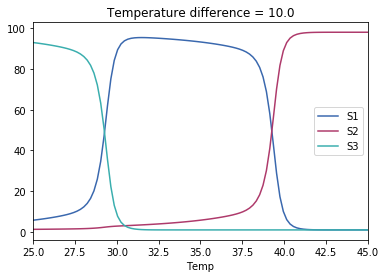

In [35]:
# List of colors for plotting: s1_col, s2_col, s3_col for species S1, S2, and S3 respectively
colors = [s1_col, s2_col, s3_col]

# Iterating through different temperature difference values and grouping the DataFrame out_df by 'Delta_T'
for t_value, group in out_df.groupby('Delta T'):
    # Plotting only 'S1', 'S2', and 'S3' columns with specified colors and using skewness values as plot titles
    group[['S1', 'S2', 'S3']].plot(color=colors, title=f"Temperature difference = {t_value}")
    plt.savefig("figs/" + f"tdiff_{t_value}.png")